##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Clasificacion Basica: Predecir una imagen de moda

Note: Nuestra comunidad de Tensorflow ha traducido estos documentos. Como las traducciones de la comunidad
son basados en el "mejor esfuerzo", no hay ninguna garantia que esta sea un reflejo preciso y actual 
de la [Documentacion Oficial en Ingles](https://www.tensorflow.org/?hl=en).
Si tienen sugerencias sobre como mejorar esta traduccion, por favor envian un "Pull request"
al siguiente repositorio [tensorflow/docs](https://github.com/tensorflow/docs).
Para ofrecerse como voluntario o hacer revision de las traducciones de la Comunidad
por favor contacten al siguiente grupo [docs@tensorflow.org list](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs).

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas. No hay problema sino entiende todos los detalles; es un repaso rapido de un programa completo de Tensorflow con los detalles explicados a medida que avanza.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

In [1]:
# TensorFlow y tf.keras

import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Moda MNIST esta construida como un reemplazo para el set de datos clasico [MNIST](http://yann.lecun.com/exdb/mnist/) 
casi siempre utilizado como el "Hola Mundo" de programas de aprendizaje automatico (ML) para computo de vision. El set de datos de MNIST contiene imagenes de digitos escrito a mano (0, 1, 2, etc.) en un formato identico al de los articulos de ropa que va a utilizar aca.

Esta guia utiliza Moda MNIST para variedad y por que es un poco mas retador que la regular MNIST. Ambos set de datos son relativamente pequenos y son usados para verificar que el algoritmo funciona como debe.

Aca, 60,000 imagenes son usadas para entrenar la red neuronal y 10,000 imagenes son usadas para evaluar que tan exacto aprendia la red a clasificar imagenes. Pueden acceder al set de moda de MNIST directamente desde TensorFlow. Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

[link text](https://)Al cargar el set de datos retorna cuatro arreglos en NumPy:

* El arreglo `train_images` y `train_labels` son los arreglos que *training set*—el modelo de datos usa para aprender.
* el modelo es probado contra los arreglos *test set*, el `test_images`, y `test_labels`.

Las imagenes son 28x28 arreglos de NumPy, con valores de pixel que varian de 0 a 255. Los *labels* son un arreglo de integros, que van del 0 al 9. Estos corresponden a la *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidoen el dataset, almacenelo aca para usarlos luego cuando se visualicen las imagenes:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore el set de datos

Explore el formato de el set de datos antes de entrenar el modelo. Lo siguiente muestra que hay 60,000 imagenes en el set de entrenamiento, con cada imagen representada por pixeles de 28x28:

In [28]:
train_images.shape

(60000, 28, 28)

Asimismo, hay 60,000 etiquetas en el set de entrenamiento:

In [29]:
len(train_labels)

60000

Cada etiqueta es un integro entre 0 y 9:

In [30]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Hay 10,000 imagenes en el set de pruebas. Otra vez, cada imagen es representada como pixeles de 28x28:

In [31]:
test_images.shape

(10000, 28, 28)

Y el set de pruebas contiene 10,000 etiquetas de imagen:

In [32]:
len(test_labels)

10000

## Pre-procese el set de datos

El set de datos debe ser pre-procesada antes de entrenar la red. Si usted inspecciona la primera imagen en el set de entrenamiento, va a encontrar que los valores de los pixeles estan entre 0 y 255:

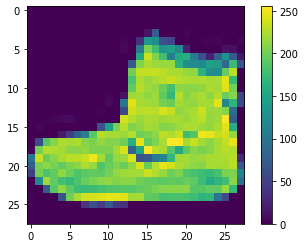

In [33]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Escale estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal. Para hacero, divida los valores por 255. Es importante que el *training set* y el *testing set* se pre-procesen de la misma forma:

In [34]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

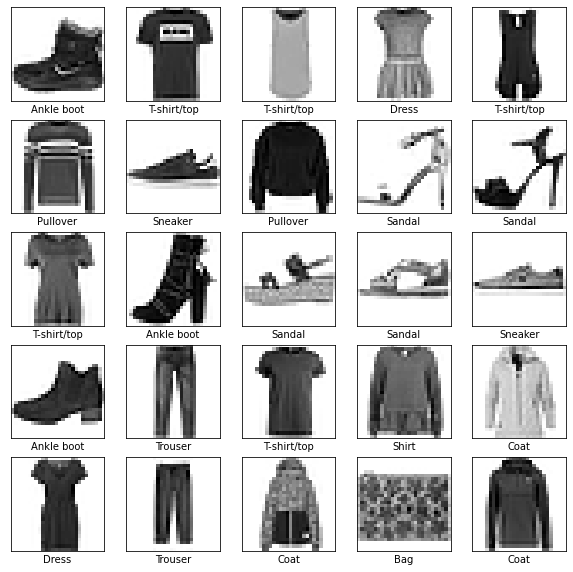

In [35]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [36]:
train_images[0].shape

(28, 28)

In [37]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images_2 = train_images.reshape(60000,28,28,1)
train_images_2.shape

(60000, 28, 28, 1)

In [39]:
np.array([[[2,5 ], [8,9]]]).shape

(1, 2, 2)

In [40]:
np.array([[[2],[5] ], [[8],[9]]]).shape

(2, 2, 1)

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas

Los bloques de construccion basicos de una red neuronal son las *capas* o *layers*. Las capas extraen representaciones de el set de datos que se les alimentan. Con suerte, estas representaciones son considerables para el problema que estamos solucionando.

La mayoria de aprendizaje profundo consiste de unir capas sencillas. 
La mayoria de las capas como `tf.keras.layers.Dense`, tienen parametros que son aprendidos durante el entrenamiento.

In [5]:
# Si se utiliza SparseCategorial hay que asignar tantas neuronas de salida como Clases en tus datos con la función de activación Softmax (probabilidades)

# Si se utiliza Categorical sin Sparse, entonces es una neurona de salida****

model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), padding="same", input_shape=(28, 28, 1),activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    #keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

La primera capa de esta red, `tf.keras.layers.Flatten`, 
transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles). Observe esta capa como una capa no apilada de filas de pixeles en la misma imagen y alineandolo. Esta capa no tiene parametros que aprender; solo reformatea el set de datos.

Despues de que los pixeles estan "aplanados", la secuencia consiste de dos capas`tf.keras.layers.Dense`. Estas estan densamente conectadas, o completamente conectadas. La primera capa `Dense` tiene 128 nodos (o neuronas). La segunda (y ultima) capa es una capa de 10 nodos *softmax* que devuelve un arreglo de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.

### Compile el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
* *Optimizer* — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.
El siguiente ejemplo usa *accuracy* (exactitud) , la fraccion de la imagenes que son correctamente clasificadas.

In [42]:
y_real = 2
y_pred = 3

# primera posición = bota
# segunda posición = camiseta
# tercera posición = chancleta
y_real = [0,0,1,0,0,0,0,0,0,0]  # one-hot vector
y_pred = [0.1, 0.3, 0.5,0,0,0,0,0,0,0.1]  # salida de la red neuronal

In [6]:

#keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,607,690
Trainable params: 1,607,690
Non-trainable params: 0
_________________________________________________________________


## Entrenar el Modelo

Entrenar el modelo de red neuronal requiere de los siguientes pasos:

1. Entregue los datos de entrenamiento al modelo. En este ejemplo , el set de datos de entrenamiento estan en los arreglos `train_images` y `train_labels`.
2. el modelo aprende a asociar imagenes y etiquetas.
3. Usted le pregunta al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo,incluido en el arreglo `test_images`. Verifique que las predicciones sean iguales a las etiquetas de el arreglo`test_labels`.

Para comenzar a entrenar, llame el metodo `model.fit`, es llamado asi por que *fit* (ajusta) el modelo a el set de datos de entrenamiento:

In [46]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


ValueError: in user code:

    C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:235 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (32, 28, 28)


In [8]:
model.fit(train_images_2, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.9939 - accuracy: 0.8483
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2888 - accuracy: 0.8961
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2515 - accuracy: 0.9078
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2300 - accuracy: 0.9159
Epoch 5/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2081 - accuracy: 0.9230
Epoch 6/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1963 - accuracy: 0.9282
Epoch 7/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1743 - accuracy: 0.9359
Epoch 8/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1643 - accuracy: 0.9397
Epoch 9/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1475 - accuracy: 0.9442
Epoch 10/10
1875/1875 [==============================] - 46s 24m

A medida que el modelo entrena, la perdida y la exactitud son desplegadas. Este modelo alcanza una exactitud de 0.88 (o 88%) sobre el set de datos de entrenamiento.

## Evaluar Exactitud

Siguente, compare como el rendimiento del modelo sobre el set de datos:

In [9]:
test_images_2 = test_images.reshape(10000,28,28,1)
test_images_2.shape

(10000, 28, 28, 1)

In [10]:
test_loss, test_acc = model.evaluate(test_images_2,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.4440 - accuracy: 0.8914

Test accuracy: 0.8913999795913696


Resulta que la exactitud sobre el set de datos es un poco menor que la exactitud sobre el set de entrenamiento. Esta diferencia entre el entrenamiento y el test se debe a *overfitting* (sobre ajuste). Sobre ajuste sucede cuando un modelo de aprendizaje de maquina (ML) tiene un rendimiento peor sobre un set de datos nuevo, que nunca antes ha visto comparado con el de entrenamiento.

## Hacer predicciones

Con el modelo entrenado usted puede usarlo para hacer predicciones sobre imagenes.

In [12]:
predictions = model.predict(test_images_2)

Aquí, el modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [13]:
predictions[0]

array([1.6343780e-19, 1.4080680e-26, 6.2969813e-27, 3.6359129e-13,
       7.4760949e-16, 2.8589128e-12, 2.2819398e-18, 1.7103844e-08,
       2.4806287e-15, 1.0000000e+00], dtype=float32)

*una* prediccion es un arreglo de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Ustedes pueden revisar cual tiene el nivel mas alto de confianza:

In [14]:
np.argmax(predictions[0])

9

In [15]:
predictions[0][9]

1.0

Entonces,el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificaion es correcta:

In [ ]:
test_labels[0]

9

**Grafique** esto para poder ver todo el set de la prediccion de las 10 clases.

In [16]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Miremos la imagen [0], sus predicciones y el arreglo de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

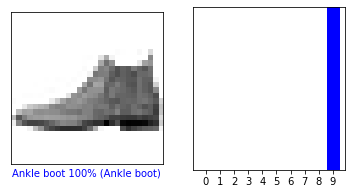

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

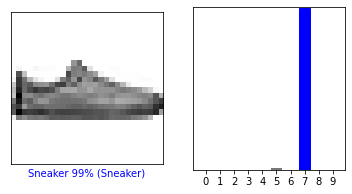

In [21]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

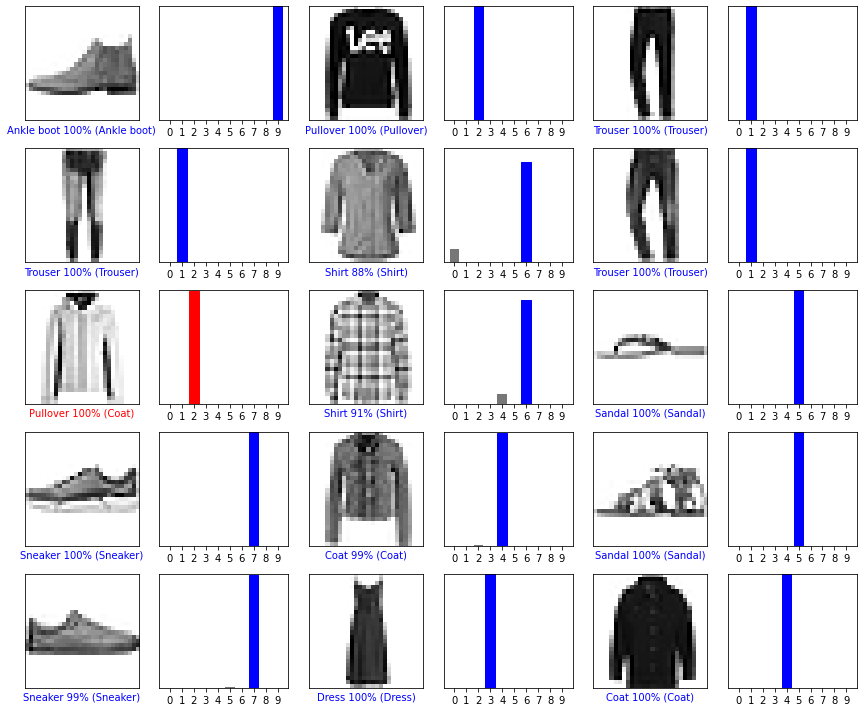

In [22]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [23]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


Los modelos de `tf.keras` son optimizados sobre *batch* o bloques, 
o coleciones de ejemplos por vez.
De acuerdo a esto, aunque use una unica imagen toca agregarla a una lista:

In [26]:
# Add the image to a batch where it's the only member.
img_ = (np.expand_dims(img,0))
img_ = img_.reshape(1,28,28,1)
print(img_.shape)

(1, 28, 28, 1)


Ahora prediga la etiqueta correcta para esta imagen:

In [27]:
predictions_single = model.predict(img_)

print(predictions_single)

[[1.1246917e-07 1.8564159e-26 9.9992836e-01 1.4280444e-13 3.3873121e-07
  6.0989228e-26 7.1108821e-05 7.3901299e-31 1.2650927e-17 3.6070082e-32]]


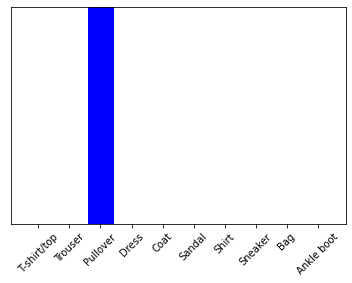

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` retorna una lista de listas para cada imagen dentro del *batch* o bloque de datos. Tome la prediccion para nuestra unica imagen dentro del *batch* o bloque:

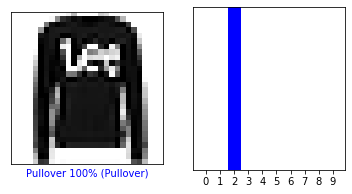

In [29]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

2

Y el modelo predice una etiqueta de 2.